In [18]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Ofrece un servicio que escanea fotografías para almacenarlas digitalmente. Utiliza una máquina que escanea rápidamente muchas fotos, pero dependiendo de la orientación de la foto original, muchas imágenes se digitalizan de lado. Una persona podria corrige estas manualmente, mirando cada foto para determinar cuáles girar. En este ejercicio, construirás un modelo que distinga cuáles fotos están de lado y cuáles están en posición vertical, para que una aplicación pueda girar automáticamente cada imagen si es necesario. Si fueras a vender este servicio comercialmente, podrías usar un gran conjunto de datos para entrenar el modelo. Pero tendrás un gran éxito incluso con un pequeño conjunto de datos. Trabajarás con un pequeño conjunto de imágenes de perros, la mitad de las cuales están giradas de lado. Especificar y compilar el modelo se ve igual que en el ejemplo que has visto. Pero necesitarás hacer algunos cambios para ajustar el modelo.

In [25]:
num_classes = 2
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels.h5'
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
my_new_model.add(Dense(num_classes, activation='softmax'))
my_new_model.layers[0].trainable = False

Tienes 220 imágenes de datos de entrenamiento y 217 de datos de validación. Para el generador de entrenamiento, hemos establecido un tamaño de lote de 10. Determina el valor adecuado de steps_per_epoch en tu llamada a fit_generator. Al usar WandbCallback, se registrarán automáticamente las métricas que se están optimizando en el panel de control.

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17528\2815500326.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = my_new_model.fit_generator(


25/25 [==============================] - 8s 181ms/step - loss: 0.0700 - accuracy: 0.9861 - val_loss: 0.1248 - val_accuracy: 0.9500


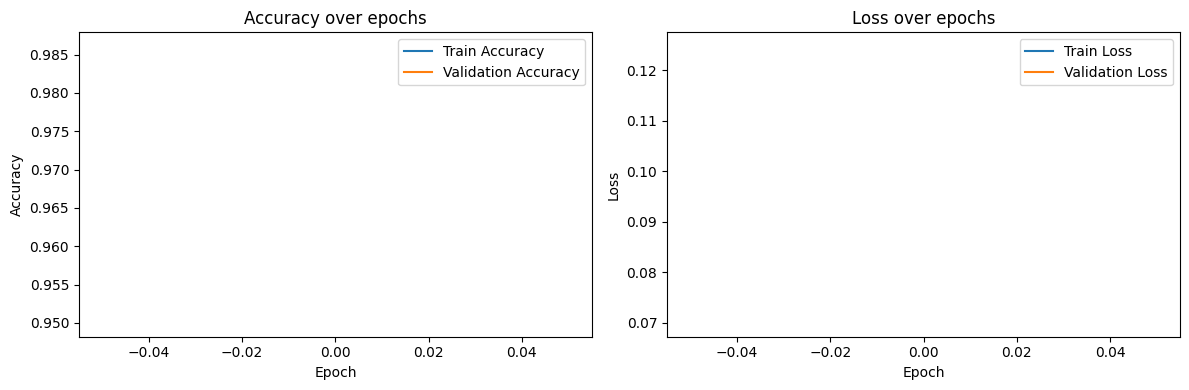

In [28]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')


validation_generator = data_generator.flow_from_directory(
        'rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')


history = my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=25,
        validation_data=validation_generator,
        validation_steps=1)

# Graficar accuracy y loss de entrenamiento y validación
plt.figure(figsize=(12, 4))

# Graficar accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Graficar loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()